# Connect to Google Drive

In [20]:
# connect to gdrive
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 amusement.csv		 review_consolidated.csv
 Aspect			 ReviewData
 aspect_summrize.csv	 SentenceData
 extract_reviews.ipynb	 SentenceDataAspect
 latest_pre_processed	 SentenceDataMultipleAspect
 PLP_Presentation.pptx	 SentenceDataSingelAspect
'PLP Report.gdoc'	'sentence-Singapore_Mass_Rapid_Transit_SMRT - new.csv'
 preprocessed


In [21]:
# Change your path here
from os import getcwd, chdir

fpath = '/content/drive/My Drive/nlp_project'
chdir(fpath)
getcwd()

'/content/drive/.shortcut-targets-by-id/1m5FDUbcdSaAfBr0Dhf82nh7PlE6caPgh/nlp_project'

In [22]:
!ls

 amusement.csv		 review_consolidated.csv
 Aspect			 ReviewData
 aspect_summrize.csv	 SentenceData
 extract_reviews.ipynb	 SentenceDataAspect
 latest_pre_processed	 SentenceDataMultipleAspect
 PLP_Presentation.pptx	 SentenceDataSingelAspect
'PLP Report.gdoc'	'sentence-Singapore_Mass_Rapid_Transit_SMRT - new.csv'
 preprocessed


In [23]:
import csv
import re
import os
import pandas as pd


# Load review data

In [ ]:
# all review data
folder_path = './ReviewData'
file_names = os.listdir(folder_path)
file_names

['Singapore Zoo.csv',
 'Buddha Tooth Relic Temple and Museum.csv',
 'Battlebox.csv',
 'Waterfront Promenade.csv',
 'Flower Dome.csv',
 'Jurong Bird Park.csv',
 'National Museum of Singapore.csv',
 'Singapore Cable Car.csv',
 'Night Safari.csv',
 'Clarke Quay.csv',
 'Raffles Hotel Arcade.csv',
 'MacRitchie Nature Trail.csv',
 'Bugis Street.csv',
 'ArtScience Museum at Marina Bay Sands.csv',
 'Long Bar.csv',
 'Singapore River Cruise.csv',
 'Bike Around Tour.csv',
 'CÉ LA VI Singapore.csv',
 'River Wonders.csv',
 'Singapore Flyer.csv',
 'Asian Civilisations Museum.csv',
 'Changi Chapel and Museum.csv',
 'Maxwell Food Centre.csv',
 'The Shoppes at Marina Bay Sands.csv',
 'Arab Street.csv',
 'Little India.csv',
 'Singapore River.csv',
 'Mustafa Centre.csv',
 'The Helix Bridge.csv',
 'Sands_Skypark_Observation_Deck.csv',
 'Supertree_Grove.csv',
 'Chinatown.csv',
 'Orchard_Road.csv',
 'National_Orchid_Garden.csv',
 'cloud_forest_reviews.csv',
 'Gardens_by_the_Bay.csv',
 'Singapore_Botanic_Ga

In [ ]:
len(file_names)

39

# Process Review Data

In [ ]:
!pip install langdetect
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# split sentences
import csv
import re
import pandas as pd
import numpy as np
from langdetect import detect
import string
import matplotlib.pyplot as plt
from glob import glob
#text preprocess file
import unicodedata
import contractions         
import re
import nltk
from nltk import sent_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from sklearn.model_selection import train_test_split

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def split_sentences(text):
    return re.split(r'[.!?;]', text)

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)


def remove_non_ascii(text):
    # Define a list of ASCII characters
    ascii_letters = string.ascii_letters + string.digits + string.punctuation + ' '
    
    # Filter out non-ASCII characters
    ascii_text = ''.join(filter(lambda x: x in ascii_letters, text))
    
    return ascii_text

def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z\s]'
    # Remove the special characters
    filtered_text = re.sub(pattern, '', text)
    return filtered_text

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(text):
    # Define a list of stopwords for the English language
    stop_words = set(stopwords.words('english'))
    # Split the text into words
    words = text.split()
    # Remove the stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a text string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

wnl = nltk.WordNetLemmatizer()

def pos_tagger(review):
    #print(review)
    lemma_text = []
    text = nltk.word_tokenize(review)
    pos_text = nltk.pos_tag(text)
    for word, tag in pos_text:
        if tag[0] in ['N', 'V', 'J', 'R']:
            if tag in ('NN','NNPS','NNP','NNS','RB', 'RBR', 'RBS','VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ','ADV'):
                lemma_text.append(wnl.lemmatize(word,pos= tag[0].lower()))
            elif tag in ('JJR', 'JJS','JJ'):
                lemma_text.append(wnl.lemmatize(word, pos = 'a'))
            else:
                lemma_text.append(word)
    return lemma_text

def lemmatization_tagger(text):
   
    clean_text = pos_tagger(text)
    lemma_text = ' '.join(clean_text)
    return lemma_text

def detect_lang(text):
    try:
        lang = detect(x)
    except:
        lang = 'others'
    return lang

def preprocess(text):
    text = replace_contractions(text)
    text = remove_non_ascii(text)
    text = text.lower()
    text = remove_stopwords(text)
    text = remove_special_characters(text)
    text = lemmatization_tagger(text)
    return text.strip()

In [ ]:
%%time
for file in file_names:
  print(f'Processing {file}')
  output_file = f'./SentenceData/sentence-{file}'

  with open(folder_path+"/"+file, 'r', encoding='utf-8', errors='replace') as infile, open(output_file, 'w', encoding='utf-8', errors='replace', newline='') as outfile:
    reader = csv.DictReader(infile)
    # fieldnames = reader.fieldnames
    fieldnames = ['place', 'reviewer', 'reviewer_location', 'reviewer_contributions', 'review_rating', 'review_type', 'review_date', 'review_title', 'review_text']
    new_fieldnames = fieldnames + ['review_preprocessed']
    writer = csv.DictWriter(outfile, fieldnames=new_fieldnames)
    writer.writeheader()
    for row in reader:
      sentences = split_sentences(row['review_text'])
      for sentence in sentences:
        if sentence.strip():
          # print(detect_lang(sentence.strip()))
          # preprocess the sentence
          # new_row = row.copy()
          preprocessed_sentence = preprocess(sentence.strip())
          if preprocessed_sentence:
            new_row = {key: row[key] for key in fieldnames}
            new_row['review_text'] = sentence.strip()
            new_row['review_preprocessed'] = preprocessed_sentence
            writer.writerow(new_row)

Processing Singapore Zoo.csv
Processing Buddha Tooth Relic Temple and Museum.csv
Processing Battlebox.csv
Processing Waterfront Promenade.csv
Processing Flower Dome.csv
Processing Jurong Bird Park.csv
Processing National Museum of Singapore.csv
Processing Singapore Cable Car.csv
Processing Night Safari.csv
Processing Clarke Quay.csv
Processing Raffles Hotel Arcade.csv
Processing MacRitchie Nature Trail.csv
Processing Bugis Street.csv
Processing ArtScience Museum at Marina Bay Sands.csv
Processing Long Bar.csv
Processing Singapore River Cruise.csv
Processing Bike Around Tour.csv
Processing CÉ LA VI Singapore.csv
Processing River Wonders.csv
Processing Singapore Flyer.csv
Processing Asian Civilisations Museum.csv
Processing Changi Chapel and Museum.csv
Processing Maxwell Food Centre.csv
Processing The Shoppes at Marina Bay Sands.csv
Processing Arab Street.csv
Processing Little India.csv
Processing Singapore River.csv
Processing Mustafa Centre.csv
Processing The Helix Bridge.csv
Processi

# Find Aspects

In [24]:
# load all places
amusements = pd.read_excel('./Aspect/20_places.xlsx')['Place']

print(f"Number of amusements: {len(amusements)}")
amusements

Number of amusements: 20


0                               Arab Street
1      Buddha Tooth Relic Temple and Museum
2                               Clarke Quay
3                        Gardens by the Bay
4                          Jurong Bird Park
5     ArtScience Museum at Marina Bay Sands
6                       Maxwell Food Centre
7                              Merlion Park
8                            Mustafa Centre
9              National Museum of Singapore
10                   National Orchid Garden
11                             Night Safari
12                             Orchard Road
13                            River Wonders
14           Sands Skypark Observation Deck
15                          Singapore Flyer
16                          Singapore River
17                            Singapore Zoo
18                Singapore Botanic Gardens
19        Singapore Mass Rapid Transit SMRT
Name: Place, dtype: object

In [43]:
# load aspect terms

def get_aspects_df(df, place):
  aspect_df = df.loc[df['Place'] == place][['Aspect', 'Aspect Terms']]
  aspect_term_data =  [data.replace('\'', '').replace('[', '').replace(']', '').split(',') for data in aspect_df['Aspect Terms']]
  # pattern = r"['](.*?)[']"
  # aspect_term_data = [re.findall(pattern, data) for data in  aspect_df['Aspect Terms']]
  aspect_df['Aspect Terms'] = aspect_term_data
  return aspect_df

aspect_term_df = pd.read_excel('./Aspect/aspects.xlsx')[['Place', 'Aspect', 'Aspect Terms']]


In [29]:
set(aspect_term_df['Place'])

{'Arab Street',
 'ArtScience Museum at Marina Bay Sands',
 'Buddha Tooth Relic Temple and Museum',
 'Clarke Quay',
 'Gardens by the Bay',
 'Jurong Bird Park',
 'Maxwell Food Centre',
 'Merlion Park',
 'Mustafa Centre',
 'National Museum of Singapore',
 'National Orchid Garden',
 'Orchard Road',
 'River Wonders',
 'Sands Skypark Observation Deck',
 'Singapore Botanic Gardens',
 'Singapore Flyer',
 'Singapore Mass Rapid Transit SMRT',
 'Singapore River',
 'Singapore Zoo'}

In [44]:
df = get_aspects_df(aspect_term_df, "Arab Street")
df

,Aspect,Aspect Terms
0,Culture & Religion,"[street, lane, muslim, soak, sultan, neig..."
1,Shopping,"[shisha, textile, ware, silk, shop, rug, ..."
2,Food,"[restuarant, pub, dining, food, cuisine, ..."


In [45]:
# load common aspects
common_aspects = {}
common_aspects["Transportation & Accessibility"] =  ['destination', 'bus', 'map', 'transit', 'metro', 'transport', 'transportation', 'network', 'credit', 'station', 'smrt','train', 'pass', 'subway', 'route', 'journey', 'passenger', 'direction']
common_aspects["Cleanliness"] = ['sanitation', 'hygiene', 'tidiness', 'orderliness', 'neatness', 'clean', 'spotless', 'dirt', 'dust', 'litter', 'rubbish', 'stain', 'mess', 'trash', 'grime', 'smudge', 'spill']
common_aspects["Value for Money"] = ['price', 'cost', 'fee', 'discount', 'rate', 'value', 'expensive', 'cheap', 'affordable', 'budget', 'deal', 'discount', 'savings', 'economy', 'bargain', 'investment', 'worth']
common_aspects.keys()

dict_keys(['Transportation & Accessibility', 'Cleanliness', 'Value for Money'])

In [46]:
def find_aspect(sentence, aspects, aspect_terms):
  aspects_list = []
  aspect_terms_list = []
  sentence_tokens = sentence.split()
  for i in range(len(aspects)):
    aspect_terms_found = [term for term in aspect_terms[i] if term in sentence_tokens]
    if len(aspect_terms_found):
      aspects_list.append(aspects[i])
      aspect_terms_list += aspect_terms_found

  return aspect_terms_list, aspects_list


In [ ]:
amusements

0                              Arab Street
1     Buddha Tooth Relic Temple and Museum
2                              Clarke Quay
3                       Gardens by the Bay
4                         Jurong Bird Park
5                               Marina Bay
6                      Maxwell Food Centre
7                             Merlion Park
8                           Mustafa Centre
9             National Museum of Singapore
10                  National Orchid Garden
11                            Night Safari
12                            Orchard Road
13                           River Wonders
14          Sands Skypark Observation Deck
15                         Singapore Flyer
16                         Singapore River
17                           Singapore Zoo
18               Singapore Botanic Gardens
19       Singapore Mass Rapid Transit SMRT
Name: Place, dtype: object

In [47]:
amusement_n = 0 
for amusement in amusements:
  amusement_n +=1
  input_file = f'./SentenceData/sentence-{amusement}.csv'
  output_file = f'./SentenceDataAspect/sentence-aspect-{amusement}.csv'

  print(f'{amusement_n} processing {amusement}')
  df = get_aspects_df(aspect_term_df, amusement)
  aspects = list(df['Aspect'])
  aspect_terms = list(df["Aspect Terms"])

  # add common aspects
  for common_aspect in common_aspects.keys():
    if len(aspects) < 5 and common_aspect not in aspects:
     
      aspects.append(common_aspect)
      aspect_terms.append(common_aspects[common_aspect])

  
  with open(input_file, 'r', encoding='utf-8', errors='replace') as infile, open(output_file, 'w', encoding='utf-8', errors='replace', newline='') as outfile:
    
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames
    new_fieldnames = fieldnames + ['aspect', 'aspect_term']
    writer = csv.DictWriter(outfile, fieldnames=new_fieldnames)
    writer.writeheader()

    for row in reader:
      # search aspects
      sentence = row['review_preprocessed']
      aspect_terms_list, aspects_list = find_aspect(sentence, aspects, aspect_terms)
      if len(aspects_list)>0:
        new_row = {key: row[key] for key in fieldnames}
        new_row['aspect_term'] = aspect_terms_list
        new_row['aspect'] = aspects_list
        writer.writerow(new_row)


1 processing Arab Street
2 processing Buddha Tooth Relic Temple and Museum
3 processing Clarke Quay
4 processing Gardens by the Bay
5 processing Jurong Bird Park
6 processing ArtScience Museum at Marina Bay Sands
7 processing Maxwell Food Centre
8 processing Merlion Park
9 processing Mustafa Centre
10 processing National Museum of Singapore
11 processing National Orchid Garden
12 processing Night Safari
13 processing Orchard Road
14 processing River Wonders
15 processing Sands Skypark Observation Deck
16 processing Singapore Flyer
17 processing Singapore River
18 processing Singapore Zoo
19 processing Singapore Botanic Gardens
20 processing Singapore Mass Rapid Transit SMRT


# Find Sentence with multiple aspects





In [48]:
# load sentence and aspect data
folder_path = './SentenceDataAspect'
file_names = os.listdir(folder_path)
file_names

['sentence-aspect-Orchard Road.csv',
 'sentence-aspect-River Wonders.csv',
 'sentence-aspect-Arab Street.csv',
 'sentence-aspect-Sands Skypark Observation Deck.csv',
 'sentence-aspect-Clarke Quay.csv',
 'sentence-aspect-Merlion Park.csv',
 'sentence-aspect-ArtScience Museum at Marina Bay Sands.csv',
 'sentence-aspect-Maxwell Food Centre.csv',
 'sentence-aspect-Mustafa Centre.csv',
 'sentence-aspect-Buddha Tooth Relic Temple and Museum.csv',
 'sentence-aspect-Jurong Bird Park.csv',
 'sentence-aspect-National Museum of Singapore.csv',
 'sentence-aspect-Gardens by the Bay.csv',
 'sentence-aspect-Singapore Flyer.csv',
 'sentence-aspect-National Orchid Garden.csv',
 'sentence-aspect-Night Safari.csv',
 'sentence-aspect-Singapore River.csv',
 'sentence-aspect-Singapore Botanic Gardens.csv',
 'sentence-aspect-Singapore Mass Rapid Transit SMRT.csv',
 'sentence-aspect-Singapore Zoo.csv',
 'sentence-aspect-Arab Street.gsheet']

In [49]:
amusement_n = 0
sentence_num = []
multiple_aspect_sentence_num = []

for amusement in amusements:
  amusement_n +=1
  input_file = f'./SentenceDataAspect/sentence-aspect-{amusement}.csv'
  single_output_file = f'./SentenceDataSingelAspect/sentence-single-aspect-{amusement}.csv'
  multiple_output_file = f'./SentenceDataMultipleAspect/sentence-multiple-aspect-{amusement}.csv'


  print(f'{amusement_n} processing {amusement}')
  
  with open(input_file, 'r', encoding='utf-8', errors='replace') as infile, \
        open(single_output_file, 'w', encoding='utf-8', errors='replace', newline='') as single_outfile, \
        open(multiple_output_file, 'w', encoding='utf-8', errors='replace', newline='') as multiple_outfile:

    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames

    single_writer = csv.DictWriter(single_outfile, fieldnames=fieldnames)
    multiple_writer = csv.DictWriter(multiple_outfile, fieldnames=fieldnames)

    single_writer.writeheader()
    multiple_writer.writeheader()
    
    lines_n = 0
    multiple_n = 0
    for row in reader:
      lines_n += 1
      # search multiple aspects
      aspects_list = row['aspect'].split(',')
      if len(aspects_list)>1:
        multiple_n += 1
        multiple_writer.writerow(row)
      else:
        single_writer.writerow(row)

    print(f'total numebr of sentence: {lines_n}')
    print(f'sentence with multiple aspect: {multiple_n}')
    sentence_num.append(lines_n)
    multiple_aspect_sentence_num.append(multiple_n)


1 processing Arab Street
total numebr of sentence: 1176
sentence with multiple aspect: 41
2 processing Buddha Tooth Relic Temple and Museum
total numebr of sentence: 1734
sentence with multiple aspect: 60
3 processing Clarke Quay
total numebr of sentence: 2330
sentence with multiple aspect: 645
4 processing Gardens by the Bay
total numebr of sentence: 18016
sentence with multiple aspect: 2222
5 processing Jurong Bird Park
total numebr of sentence: 1206
sentence with multiple aspect: 7
6 processing ArtScience Museum at Marina Bay Sands
total numebr of sentence: 1255
sentence with multiple aspect: 41
7 processing Maxwell Food Centre
total numebr of sentence: 3823
sentence with multiple aspect: 691
8 processing Merlion Park
total numebr of sentence: 1546
sentence with multiple aspect: 62
9 processing Mustafa Centre
total numebr of sentence: 595
sentence with multiple aspect: 24
10 processing National Museum of Singapore
total numebr of sentence: 2690
sentence with multiple aspect: 118
11 

In [61]:
single_aspects_num = [total - multiple for multiple, total in zip(multiple_aspect_sentence_num, sentence_num)]
proportion = [multiple / total * 100 for multiple, total in zip(multiple_aspect_sentence_num, sentence_num)]

In [63]:
print(f'Min sentence number: {min(sentence_num)}, Max sentence number: {max(sentence_num)}')
print(f'Min sentence number with single aspect: {min(single_aspects_num)}, Max sentence number with single aspect: {max(single_aspects_num)}')
print(f'Min sentence number with multiple aspects: {min(multiple_aspect_sentence_num)}, Max sentence number with multiple aspects: {max(multiple_aspect_sentence_num)}')

Min sentence number: 510, Max sentence number: 18016
Min sentence number with single aspect: 498, Max sentence number with single aspect: 15794
Min sentence number with multiple aspects: 3, Max sentence number with multiple aspects: 2222


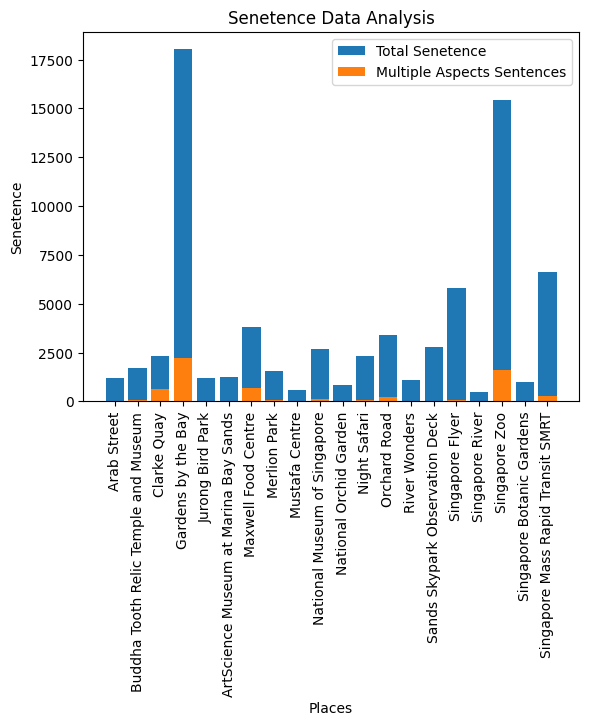

In [59]:
import matplotlib.pyplot as plt


# Plot the total number of reviews
plt.bar(amusements, sentence_num, label='Total Senetence')

# Plot the proportion of negative reviews
plt.bar(amusements, multiple_aspect_sentence_num, label='Multiple Aspects Sentences')

plt.xlabel('Places')
plt.ylabel('Senetence')
plt.title('Senetence Data Analysis')
plt.xticks(rotation=90) # Rotates X-Axis Ticks by 90-degrees
plt.legend()

# Display the plot
plt.show()